IMPORTING

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
import random
import matplotlib.pyplot as plt

DATA ANALYSIS

In [9]:
memories = pd.read_csv("C:/Users/e u n o i a/Downloads/Islander_data.csv")

In [10]:
memories.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1


In [11]:
memories.columns

Index(['first_name', 'last_name', 'age', 'Happy_Sad_group', 'Dosage', 'Drug',
       'Mem_Score_Before', 'Mem_Score_After', 'Diff'],
      dtype='object')

In [12]:
memories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   first_name        198 non-null    object 
 1   last_name         198 non-null    object 
 2   age               198 non-null    int64  
 3   Happy_Sad_group   198 non-null    object 
 4   Dosage            198 non-null    int64  
 5   Drug              198 non-null    object 
 6   Mem_Score_Before  198 non-null    float64
 7   Mem_Score_After   198 non-null    float64
 8   Diff              198 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 14.0+ KB


In [13]:
memories.describe()

,age,Dosage,Mem_Score_Before,Mem_Score_After,Diff
count,198.000000,198.000000,198.000000,198.000000,198.000000
mean,39.530303,1.989899,57.967677,60.922222,2.954545
std,12.023099,0.818504,15.766007,18.133851,10.754603
min,24.000000,1.000000,27.200000,27.100000,-40.400000
25%,30.000000,1.000000,46.525000,47.175000,-3.175000
50%,37.000000,2.000000,54.800000,56.750000,1.700000
75%,48.000000,3.000000,68.400000,73.250000,5.925000
max,83.000000,3.000000,110.000000,120.000000,49.000000


In [14]:
memories.tail()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
193,Jacob,Novak,52,H,3,T,71.3,74.3,3.0
194,Teo,Steiner,41,S,3,T,72.5,70.4,-2.1
195,Alexander,Takahashi,54,S,3,T,30.8,33.1,2.3
196,Alexandere,Takahashi,40,H,3,T,53.6,53.8,0.2
197,Chloe,Takahashi,32,S,3,T,43.1,42.1,-1.0


DATA VISUALISATION

<AxesSubplot:xlabel='Happy_Sad_group', ylabel='count'>

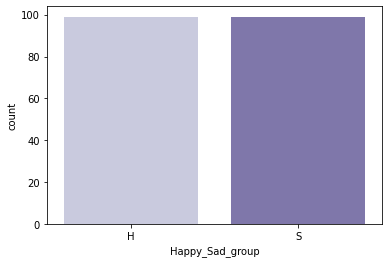

In [15]:
sns.countplot(x=memories['Happy_Sad_group'], palette="Purples")

<AxesSubplot:xlabel='Dosage', ylabel='count'>

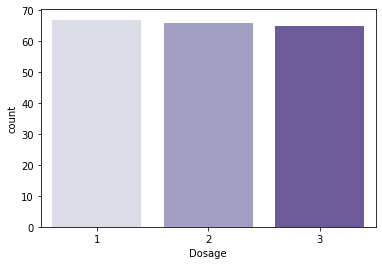

In [16]:
sns.countplot(x=memories['Dosage'], palette="Purples")

<AxesSubplot:xlabel='Drug', ylabel='count'>

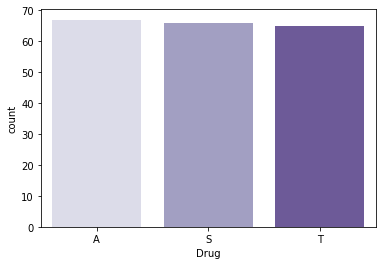

In [17]:
sns.countplot(x=memories['Drug'], palette="Purples")

In [18]:
memories= memories[['age', 'Dosage', 'Drug',
       'Mem_Score_Before', 'Mem_Score_After', 'Diff', 'Happy_Sad_group']]

In [19]:
memories

,age,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff,Happy_Sad_group
0,25,1,A,63.5,61.2,-2.3,H
1,52,1,A,41.6,40.7,-0.9,S
2,29,1,A,59.7,55.1,-4.6,H
3,50,1,A,51.7,51.2,-0.5,S
4,52,1,A,47.0,47.1,0.1,H
...,...,...,...,...,...,...,...
193,52,3,T,71.3,74.3,3.0,H
194,41,3,T,72.5,70.4,-2.1,S
195,54,3,T,30.8,33.1,2.3,S
196,40,3,T,53.6,53.8,0.2,H


In [20]:
memor=pd.get_dummies(data=memories,columns=['Drug','Happy_Sad_group'])

In [21]:
memor

,age,Dosage,Mem_Score_Before,Mem_Score_After,Diff,Drug_A,Drug_S,Drug_T,Happy_Sad_group_H,Happy_Sad_group_S
0,25,1,63.5,61.2,-2.3,1,0,0,1,0
1,52,1,41.6,40.7,-0.9,1,0,0,0,1
2,29,1,59.7,55.1,-4.6,1,0,0,1,0
3,50,1,51.7,51.2,-0.5,1,0,0,0,1
4,52,1,47.0,47.1,0.1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
193,52,3,71.3,74.3,3.0,0,0,1,1,0
194,41,3,72.5,70.4,-2.1,0,0,1,0,1
195,54,3,30.8,33.1,2.3,0,0,1,0,1
196,40,3,53.6,53.8,0.2,0,0,1,1,0


<AxesSubplot:xlabel='Drug_S', ylabel='Happy_Sad_group_H'>

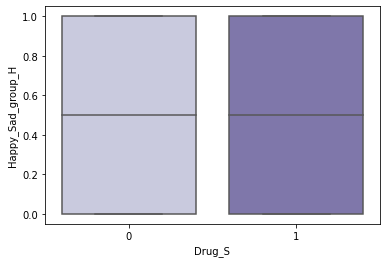

In [22]:
sns.boxplot(x=memor['Drug_S'], y=memor['Happy_Sad_group_H'], palette="Purples") #drug doesn;t determine  anything

<AxesSubplot:xlabel='Dosage', ylabel='count'>

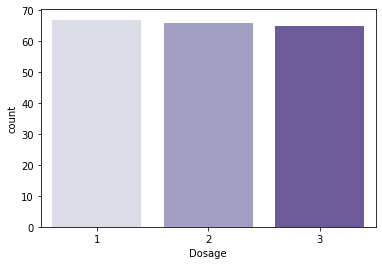

In [23]:
sns.countplot(x=memories["Dosage"], palette="Purples")

<AxesSubplot:xlabel='Happy_Sad_group_H', ylabel='Dosage'>

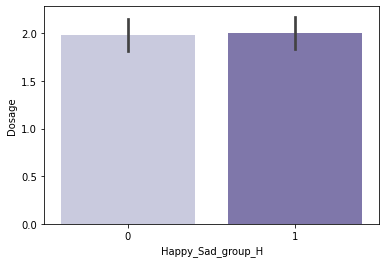

In [24]:
sns.barplot(x=memor['Happy_Sad_group_H'], y=memories['Dosage'], palette="Purples") #also doesn't change anything

<AxesSubplot:xlabel='Dosage', ylabel='Mem_Score_Before'>

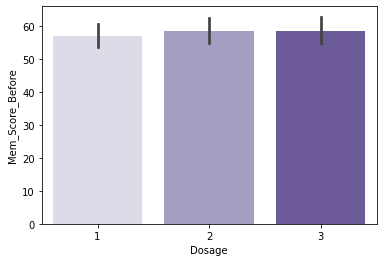

In [25]:
sns.barplot(x=memories["Dosage"], y=memories['Mem_Score_Before'], palette="Purples")

<AxesSubplot:xlabel='Dosage', ylabel='Diff'>

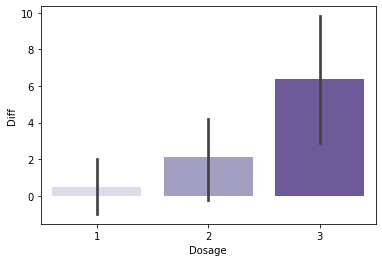

In [26]:
sns.barplot(x=memories["Dosage"], y=memories['Diff'], palette="Purples")

<AxesSubplot:xlabel='Happy_Sad_group', ylabel='Diff'>

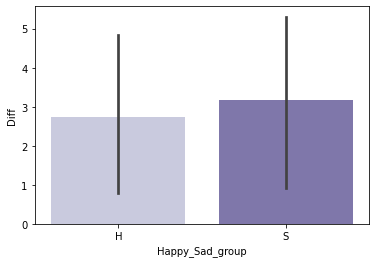

In [27]:
sns.barplot(x=memories["Happy_Sad_group"], y=memories['Diff'], palette="Purples")

WE HAVE BETTER CHANCES AT DETERMINING DOSAGE

we're using memor again

In [28]:
memor.columns

Index(['age', 'Dosage', 'Mem_Score_Before', 'Mem_Score_After', 'Diff',
       'Drug_A', 'Drug_S', 'Drug_T', 'Happy_Sad_group_H', 'Happy_Sad_group_S'],
      dtype='object')

we need to change again the table so dosage will be at the end

In [29]:
mem=memor[['age', 'Mem_Score_Before', 'Mem_Score_After', 'Diff',
       'Drug_A', 'Drug_S', 'Drug_T', 'Happy_Sad_group_H', 'Happy_Sad_group_S','Dosage']]

In [30]:
mem

,age,Mem_Score_Before,Mem_Score_After,Diff,Drug_A,Drug_S,Drug_T,Happy_Sad_group_H,Happy_Sad_group_S,Dosage
0,25,63.5,61.2,-2.3,1,0,0,1,0,1
1,52,41.6,40.7,-0.9,1,0,0,0,1,1
2,29,59.7,55.1,-4.6,1,0,0,1,0,1
3,50,51.7,51.2,-0.5,1,0,0,0,1,1
4,52,47.0,47.1,0.1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
193,52,71.3,74.3,3.0,0,0,1,1,0,3
194,41,72.5,70.4,-2.1,0,0,1,0,1,3
195,54,30.8,33.1,2.3,0,0,1,0,1,3
196,40,53.6,53.8,0.2,0,0,1,1,0,3


In [47]:
array = mem.values
random.shuffle(array)
random.shuffle(array)
random.shuffle(array)
X = array[:,0:9]
Y = array[:,9]
validation_size = 0.2
seed = 101
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

In [48]:
mod = KNeighborsClassifier()
mod.fit(X_train,Y_train)
pred = mod.predict(X_test)
pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [49]:
print(confusion_matrix(Y_test,pred))

[[37  0]
 [ 1  2]]


In [50]:
report = classification_report(Y_test,pred)
print(report)

              precision    recall  f1-score   support

         1.0       0.97      1.00      0.99        37
         2.0       1.00      0.67      0.80         3

    accuracy                           0.97        40
   macro avg       0.99      0.83      0.89        40
weighted avg       0.98      0.97      0.97        40



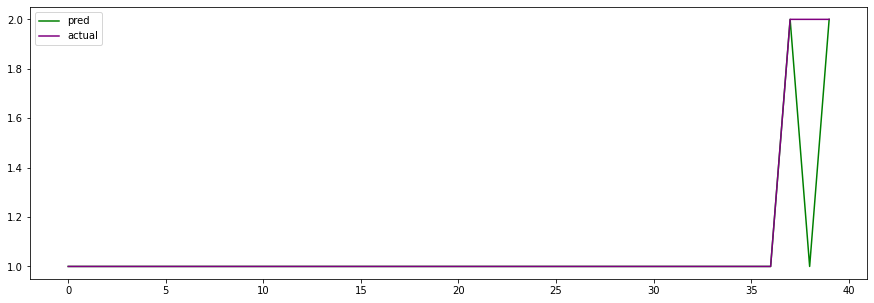

In [55]:
preds = pd.DataFrame({'y_pred': pred, 'y_test':Y_test})
preds = preds.sort_values(by='y_test')
preds = preds.reset_index()
plt.figure(figsize=(15, 5))
plt.plot(preds['y_pred'], label='pred', color="green")
plt.plot(preds['y_test'], label='actual', color="purple")
plt.legend()
plt.show()

first try - 30%

second try - 50%

third try - 97%